In [38]:
using Plots

In [39]:
T(x; c) = 2*x+c*sinpi(2*x)

T (generic function with 1 method)

The annulus is
$$
A_{r, R} = \{z \mid T'(z), 1/T'(z) \textrm{ is holomorphic}\}
$$

In [40]:
1/(2*pi)

0.15915494309189535

In [41]:
c = 1/(2*pi)-1/16

0.09665494309189535

In [42]:
F(z) = T(z; c = c)

F (generic function with 1 method)

We check that the lines with constant imaginary part end up above themselves.

In [43]:
radius(η) = minimum( imag.(F.([x+η*im for x in 0:0.001:1])))-η

radius (generic function with 1 method)

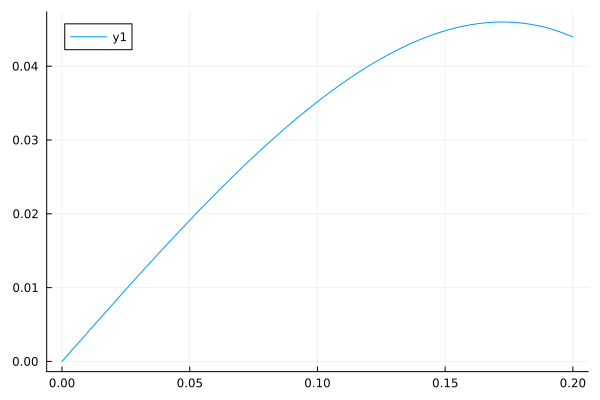

In [68]:
plot(radius, 0, 0.2)

In [70]:
bestrad, indexrad = findmax([radius(η) for η in 0:0.001:0.5])

(0.045990490255616356, 173)

In [46]:
η = 0.001*indexrad

0.101

In [47]:
all(imag.(F.([x+η*im for x in 0:0.001:1])) .> η)

true

In [48]:
ρup = minimum(imag.(F.([x+η*im for x in 0:0.001:1])))

0.13646194992366267

In [49]:
all(imag.(F.([x-η*im for x in 0:0.001:1])) .< -η)

true

In [50]:
ρdown = maximum(imag.(F.([x-η*im for x in 0:0.001:1])))

-0.13646194992366267

In [51]:
ρ = min(abs(ρup), abs(ρdown))

0.13646194992366267

The problem now reduces to compute the zeros of 
$$
T'(z) = 2+c\cdot 2\pi \cos(2\pi z)
$$.

By the formula
$$
\cos(a+i b) = \cos(a) \cosh(b)-i \sin(a)\sinh(b)
$$
since we cannot have imaginary part, we have that 
$$
\sin(2\pi \Re(z))\sinh(2\pi \Im(z)) = 0,
$$
therefore $\Re(z)=0$, $\Re(z) = 0.5$, or $\Im(z)=0$.

If $\Re(z)=0$, since $\cosh(2\pi \Im(z))$ is always positive, then $T'(z)$
cannot be $0$.

If $\Im(z)=0$ then, we already now that the derivative is bigger than $1$.

This leaves the case $\Im(z)=0.5$, this means that we need to solve the equation
$$
2-c \cdot 2\pi \cosh(2\pi b) = 0.
$$


Therefore
$$
\cosh(2\pi \cdot  b) = \frac{2}{c 2\pi}
$$

In [52]:
pole = acosh(2/(2*π*c))/2π

0.2962086496596204

In [53]:
pole > η

true

Since the pole is outside the $\eta$ strip, the constants are $\eta$ and $\rho$, and the constant is given by:
$$
\sqrt{1+2 \frac{e^{4\pi(\alpha-\eta)}}{1-e^{4\pi(\alpha-\eta)}}} e^{2\pi \eta}\left(1+2\frac{e^{-2 \pi (\rho-\alpha)}}{1-e^{-2 \pi (\rho-\alpha)}}\right)
$$
for some $\eta<\alpha<\rho$.

In [54]:
C(α; η, ρ)=sqrt(1+2*exp(4*pi*(η-α))/(1-exp(4*pi*(η-α))))exp(2*pi*η)*(1+2*exp(-2*pi*(ρ-α))/(1-exp(-2*pi*(ρ-α))))

C (generic function with 1 method)

In [55]:
C(α) = C(α; η = η, ρ = ρ)

C (generic function with 1 method)

In [56]:
N = 1024
vals = C.([η+i*(ρ-η)/N for i in 1:N-1])

1023-element Vector{Float64}:
  1153.672875351606
   816.5615914040404
   667.3674318208466
   578.519174171763
   517.9469687977358
   473.2794481431541
   438.59901657170536
   410.6723965878919
   387.56407621968344
   368.035290755034
     ⋮
  4132.242641332626
  4646.557120463958
  5307.822491804039
  6189.514190396073
  7423.887999362524
  9275.455485005077
 12361.410302107377
 18533.33341512354
 37049.12964655143

In [57]:
best, index = findmin(vals)

(93.4477040801288, 341)

In [58]:
α = η+index*(ρ-η)/N

0.11280910637106345

In [59]:
ratio = exp(-2*π*(α))

0.8619007112798852

In [60]:
k = 512

512

In [61]:
ratio^k

8.99718032881881e-34

In [62]:
(ratio^k*best)

8.407658449230161e-32

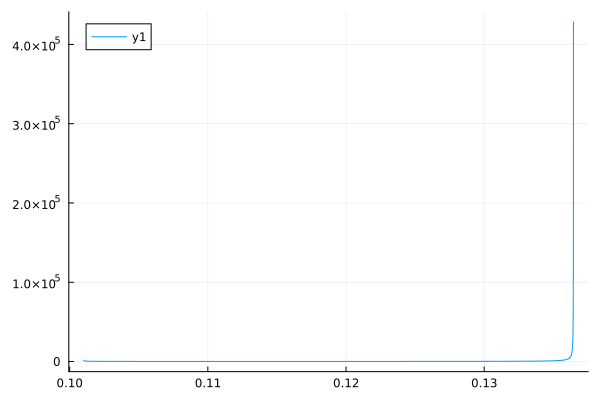

In [63]:
plot(α-> C(α; η = η, ρ = ρ), η, ρ)